In [1]:
import torch
import torch.nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from boardGPT.models import GameAutoEncoder
from transformers import AutoTokenizer

In [2]:
model, model_config = GameAutoEncoder.from_pretrained(repo_id="theartificialis/Othello-Synthetic-AutoEncoder-20m-S")

In [3]:
tokenizer = AutoTokenizer.from_pretrained("theartificialis/Othello-Synthetic-AutoEncoder-20m-S", subfolder="tokenizer")

In [4]:
c4_enc = model.encode_moves("c4", tokenizer=tokenizer)
f5_enc = model.encode_moves("f5", tokenizer=tokenizer)
d3_enc = model.encode_moves("d3", tokenizer=tokenizer)
e6_enc = model.encode_moves("e6", tokenizer=tokenizer)

In [5]:
l2 = torch.norm(c4_enc - f5_enc, p=2)
l2

tensor(1.9930)

In [6]:
cos_sim = torch.nn.functional.cosine_similarity(c4_enc, f5_enc)
cos_sim

tensor([0.9512])

In [7]:
encs = torch.cat((c4_enc, f5_enc, d3_enc, e6_enc), dim=0)

In [8]:
encs_norm = F.normalize(encs, p=2, dim=1)

In [9]:
sim_matrix = torch.matmul(encs_norm, encs_norm.T)

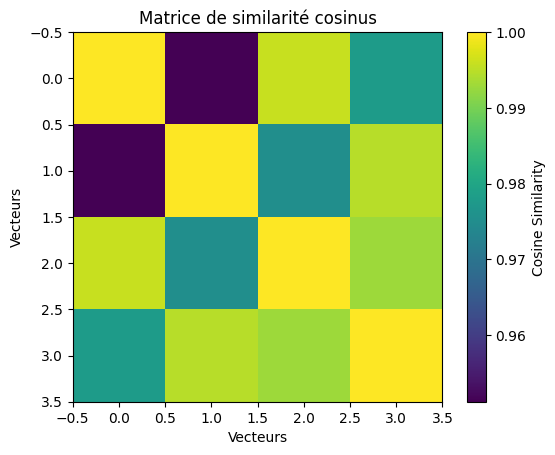

In [10]:
plt.imshow(sim_matrix.numpy(), cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title("Matrice de similarité cosinus")
plt.xlabel("Vecteurs")
plt.ylabel("Vecteurs")
plt.show()